<a href="https://colab.research.google.com/github/jiaan-xu/Python_udacity_project/blob/master/Milestone_02_SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PubMed 200k RCT SkimLit NLP Model
The purpose of this project is to replicate the deep learning model presented in the 2016 MIT paper *Neural Networks for Joint Sentence Classification in Medical Paper Abstracts* by Frank Denoncourt, Ji Young Lee and Peter Szolovits.
The model's task is to label medical abstract sentences and label each one with the role they serve in the paper. \
**For example given an abstract input:**
> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

**The model can correctly output:**
```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```
The dataset used for training and evaluating the model, , *PubMed 200k RCT*, is given by the same authors through Github. It consists of 200,000 abstracts of randomized controlled trials with each sentence of each abstract labelled with its role: background, objective, method, result, or conclusion. The dataset also contains a smaller subset of the main dataset with 20,000 abstracts.
There are two versions of both the main dataset and the smaller dataset: one with the original text and one with all numbers replaced by the '@' symbol.
\
*Sources*:
* Github Dataset https://github.com/Franck-Dernoncourt/pubmed-rct
* Deep Learning Model https://arxiv.org/pdf/1612.05251.pdf

## Importing the relevant libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

## Downloading the data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (30/30), done.


In [ ]:
!ls pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!ls '/content/pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign'

dev.txt  test.txt  train.zip


In [ ]:
!ls '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'

dev.txt  test.txt  train.txt


## Preprocessing the data

In [ ]:
# Defining a function to get each single line from the files
def get_lines(filename):
  '''
  Takes in a filename and returns the lines of text inside the file

  Args:
    Filename(str): path of the filename
  '''
  with open(filename, 'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
train_lines[:40]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
# Defining a preprocessing function to store each sentence and its target label in a dictionary
def preprocessing_text(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """

  input_lines = get_lines(filename)
  abstract_lines = ""
  samples = []
  for line in input_lines:
    if line.startswith("###"):
      abstract_lines = ""
    elif line.isspace():
      abstract_lines_split = abstract_lines.splitlines()
      for line_number, line_text  in enumerate(abstract_lines_split):
        line_dict = {}
        line_text_split = line_text.split('\t')
        line_dict['target'] = line_text_split[0]
        line_dict['text'] = line_text_split[1].lower()
        line_dict['line number'] = line_number
        line_dict['total lines'] = len(abstract_lines_split) - 1
        samples.append(line_dict)
    else:
      abstract_lines += line
  return samples

In [ ]:
train_preprocessed = preprocessing_text("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt")
validation_preprocessed = preprocessing_text('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt')
test_preprocessed = preprocessing_text('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')

In [ ]:
train_preprocessed[:5]

[{'line number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total lines': 11},
 {'line number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total lines': 11},
 {'line number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total lines': 11},
 {'line number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total lines': 11},
 {'line number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
# Getting the training, validation, and test data into pandas dataframes
train_df = pd.DataFrame(train_preprocessed)
validation_df = pd.DataFrame(validation_preprocessed)
test_df = pd.DataFrame(test_preprocessed)

train_df.head()

,target,text,line number,total lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
len(train_df), len(validation_df), len(test_df)

(180040, 30212, 30135)

[None, None, None, None, None, None, None, None, None, None]

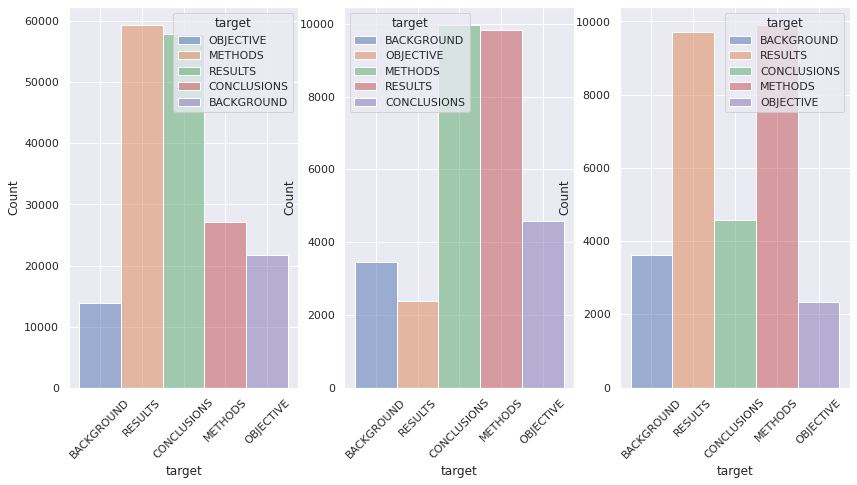

In [ ]:
# Exploring the distribution of target labels in the datasets
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 7), sharex = True)
sns.histplot(ax = ax1, x = train_df['target'], hue = train_df['target'])
sns.histplot(ax = ax2, x = validation_df['target'], hue = validation_df['target'])
sns.histplot(ax = ax3, x = test_df['target'], hue = test_df['target'])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

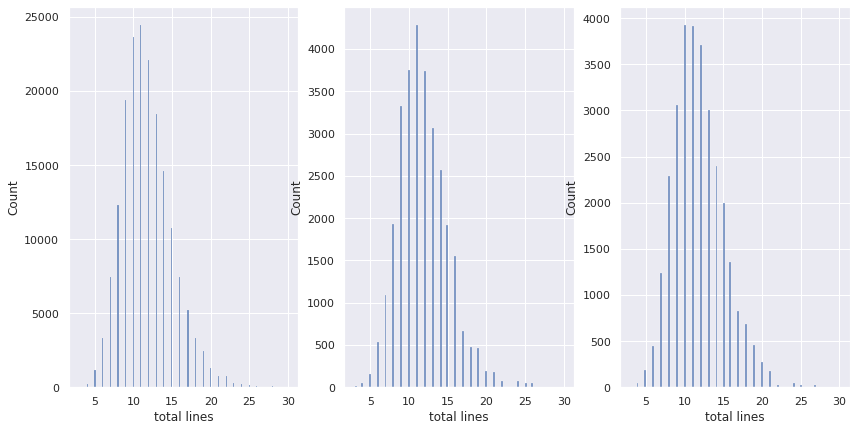

In [ ]:
# Exploring the distribution of total lines per medical abstract in the datasets
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 7), sharex = True)
sns.histplot(ax = ax1, x = train_df['total lines'])
sns.histplot(ax = ax2, x = validation_df['total lines'])
sns.histplot(ax = ax3, x = test_df['total lines'])

In [ ]:
# Separating text sentences from their target labels
train_sentences, train_labels = train_df['text'].to_numpy(), train_df['target'].to_numpy()
validation_sentences, validation_labels = validation_df['text'].to_numpy(), validation_df['target'].to_numpy()
test_sentences, test_labels = test_df['text'].to_numpy(), test_df['target'].to_numpy()

train_sentences[:10], train_labels[:10]

(array(['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
        'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
        'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
        'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
        'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
        'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscr

### One-Hot Encoding Labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Creating a one-hot encoding for each of the label datasets
one_hot_encoder = OneHotEncoder(sparse = False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1))
validation_labels_one_hot = one_hot_encoder.transform(validation_labels.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_labels.reshape(-1, 1))
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Integer encoding labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating an integer encoding for each of the label datasets
label_encoder = LabelEncoder()
train_labels_int = label_encoder.fit_transform(train_labels)
validation_labels_int = label_encoder.transform(validation_labels)
test_labels_int = label_encoder.transform(test_labels)
train_labels_int

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Model 0: Multinomial Naive Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Instantiating the pipeline for the multinomial naive bayes model
model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())
])

In [ ]:
# Fitting the model
model_0.fit(train_sentences, train_labels_int)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Model results
model_0.score(test_sentences, test_labels_int)

0.716674962667994

In [ ]:
# Defining a function to evaluate models based on four classification metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def model_evaluation(y_true, y_pred):
  precision_score, recall_score, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
  dict = {'Accuracy':accuracy_score(y_true, y_pred),
          'Precision':precision_score,
          'Recall':recall_score,
          'F1':f1_score}
  return dict

In [ ]:
# Model metrics
model_0_preds = model_0.predict(test_sentences)
model_0_results = model_evaluation(test_labels_int, model_0_preds)
model_0_results

{'Accuracy': 0.716674962667994,
 'F1': 0.6925101703856846,
 'Precision': 0.7124322482375202,
 'Recall': 0.716674962667994}

## Model 1: Conv1D with Token-level Embedding

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Creating a text vectorizer layer
sentence_lengths = [len(i.split()) for i in train_sentences]
MAX_TOKENS = 68000 # Derived from the research paper
MAX_LENGTH = int(np.percentile(sentence_lengths, q = 95)) # Length of the token vectors will cover 95% of the sentences in length
text_vectorizer = TextVectorization(max_tokens = MAX_TOKENS,
                                    output_sequence_length = MAX_LENGTH,
                                    output_mode = 'int',
                                    pad_to_max_tokens = True)

# Adapting the vectorizer to our training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# Configuration of the instantiated text vectorizer
text_vectorizer.get_config()

{'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': True,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary_size': 64841}

In [ ]:
from tensorflow.keras import layers
#Creating an embedding layer for our text token vectors
OUTPUT_DIM = 64 # Derived from the research paper

embedder = layers.Embedding(input_dim = MAX_TOKENS,
                            output_dim = OUTPUT_DIM,
                            input_length = MAX_LENGTH,
                            mask_zero = True)

In [ ]:
# Creating tf.data datasets for each of our dataframes.
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_sentences, validation_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [ ]:
# Batching and prefetching the datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Outlining the CONV1D model
FILTERS_NUM = 32
KERNEL_SIZE = 3

inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedder(x)
x = layers.Conv1D(filters = FILTERS_NUM,
                  kernel_size = KERNEL_SIZE,
                  padding = 'same',
                  activation = 'relu')(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(len(np.unique(train_labels)))(x)
outputs = layers.Activation(activation = 'softmax')(x)

In [ ]:
# Creating and compiling the model
model_1 = tf.keras.Model(inputs = inputs, outputs = outputs)
model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
embedding (Embedding)        (None, 55, 64)            4352000   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 32)            6176      
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
_________________________________________________________________
activation (Activation)      (None, 5)                 0     

In [ ]:
# Creating the TensorBoard and earlystopping callbacks for the model training
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = '/content/TensorBoard/model_1_conv1D_tokens')
early_stopper = tf.keras.callbacks.EarlyStopping(patience = 1)

# Fitting the model
history_1 = model_1.fit(train_dataset,
                        epochs = 10,
                        verbose = 1,
                        callbacks = [early_stopper, tensorboard_cb],
                        validation_data = validation_dataset)

Epoch 1/10
5627/5627 [==============================] - 243s 41ms/step - loss: 0.6496 - accuracy: 0.7612 - val_loss: 0.5505 - val_accuracy: 0.8057
Epoch 2/10
5627/5627 [==============================] - 226s 40ms/step - loss: 0.4863 - accuracy: 0.8291 - val_loss: 0.5434 - val_accuracy: 0.8084
Epoch 3/10
5627/5627 [==============================] - 225s 40ms/step - loss: 0.4219 - accuracy: 0.8544 - val_loss: 0.5641 - val_accuracy: 0.8052


In [ ]:
model_1.evaluate(test_dataset)

942/942 [==============================] - 3s 3ms/step - loss: 0.5822 - accuracy: 0.7975


[0.5822483897209167, 0.7975443601608276]

In [ ]:
# Model 1 metrics
model_1_probs = model_1.predict(test_sentences)
model_1_preds = tf.argmax(model_1_probs,axis = 1)
model_1_results = model_evaluation(test_labels_int.reshape(-1, 1), model_1_preds)
model_1_results

{'Accuracy': 0.7975443836071013,
 'F1': 0.7948461960595375,
 'Precision': 0.7933171401322513,
 'Recall': 0.7975443836071013}

## Model 2: Feature Extractor
The feature extraction of model 2 will be taking advantage of the glove vectorizer developed by Stanford University.
All the code used to instantiate the glove vectorizer is derived from the university's research paper.

In [ ]:
word_index = dict(zip(text_vectorizer.get_vocabulary(), range(len(text_vectorizer.get_vocabulary()))))

In [ ]:
word_index

{'': 0,
 '[UNK]': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'in': 5,
 'to': 6,
 'with': 7,
 'a': 8,
 'were': 9,
 'was': 10,
 'for': 11,
 'patients': 12,
 'group': 13,
 'p': 14,
 'at': 15,
 'or': 16,
 'study': 17,
 'on': 18,
 'treatment': 19,
 'is': 20,
 'after': 21,
 'by': 22,
 'this': 23,
 'groups': 24,
 'as': 25,
 'an': 26,
 'from': 27,
 'that': 28,
 'randomized': 29,
 'between': 30,
 'not': 31,
 'trial': 32,
 'no': 33,
 'compared': 34,
 'control': 35,
 'be': 36,
 'significant': 37,
 'intervention': 38,
 'significantly': 39,
 'n': 40,
 'months': 41,
 'than': 42,
 'we': 43,
 'vs': 44,
 'rsb': 45,
 'lsb': 46,
 'clinical': 47,
 'placebo': 48,
 'baseline': 49,
 'ci': 50,
 'two': 51,
 'during': 52,
 'weeks': 53,
 'both': 54,
 'had': 55,
 'primary': 56,
 'mean': 57,
 'are': 58,
 'using': 59,
 'participants': 60,
 'there': 61,
 'all': 62,
 'time': 63,
 'years': 64,
 'pain': 65,
 'therapy': 66,
 'who': 67,
 'mg': 68,
 'more': 69,
 'effect': 70,
 'effects': 71,
 'but': 72,
 'risk': 73,
 'difference

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-05-31 00:39:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-31 00:39:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-31 00:39:58--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import os
path_to_glove_file = os.path.join(os.path.expanduser('~'), '/content/glove.6B.100d.txt')
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(text_vectorizer.get_vocabulary()) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 29730 words (35111 misses)


In [ ]:
# Creating the embedding layer from the glove vectorizer
embedder_2 = layers.Embedding(input_dim = num_tokens,
                              output_dim = embedding_dim,
                              embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
                              trainable = False)

In [ ]:
# Outlining the model
inputs = layers.Input(shape = (1, ), dtype = tf.string)
tokens = text_vectorizer(inputs)
embeddings = embedder_2(tokens)
x = layers.Dense(128, activation = 'relu')(embeddings)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(5)(x)
outputs = layers.Activation(activation = 'softmax')(x)

In [ ]:
# Creating and compiling the model
model_2 = tf.keras.Model(inputs = inputs, outputs = outputs)
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 55, 100)           6484300   
_________________________________________________________________
dense_1 (Dense)              (None, 55, 128)           12928     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0   

In [ ]:
# Creating the TensorBoard callback for model 2
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = '/content/TensorBoard/model_2_GloVe_feature_extractor')

# Fitting the model
history_2 = model_2.fit(train_dataset,
            epochs = 10,
            verbose = 1,
            callbacks = [early_stopper, tensorboard_cb],
            validation_data = validation_dataset)

Epoch 1/10
5627/5627 [==============================] - 23s 4ms/step - loss: 0.8617 - accuracy: 0.6732 - val_loss: 0.7743 - val_accuracy: 0.7146
Epoch 2/10
5627/5627 [==============================] - 22s 4ms/step - loss: 0.7461 - accuracy: 0.7249 - val_loss: 0.7250 - val_accuracy: 0.7364
Epoch 3/10
5627/5627 [==============================] - 22s 4ms/step - loss: 0.7075 - accuracy: 0.7413 - val_loss: 0.6980 - val_accuracy: 0.7474
Epoch 4/10
5627/5627 [==============================] - 22s 4ms/step - loss: 0.6836 - accuracy: 0.7503 - val_loss: 0.6802 - val_accuracy: 0.7540
Epoch 5/10
5627/5627 [==============================] - 22s 4ms/step - loss: 0.6665 - accuracy: 0.7579 - val_loss: 0.6674 - val_accuracy: 0.7594
Epoch 6/10
5627/5627 [==============================] - 22s 4ms/step - loss: 0.6532 - accuracy: 0.7633 - val_loss: 0.6579 - val_accuracy: 0.7638
Epoch 7/10
5627/5627 [==============================] - 22s 4ms/step - loss: 0.6425 - accuracy: 0.7677 - val_loss: 0.6498 - val_ac

In [ ]:
model_2.evaluate(test_dataset)

942/942 [==============================] - 3s 3ms/step - loss: 0.6539 - accuracy: 0.7634


[0.6538878679275513, 0.763364851474762]

In [ ]:
# Model 2 metrics
model_2_probs = model_2.predict(test_sentences)
model_2_preds = tf.argmax(model_2_probs, axis = 1)
model_2_results = model_evaluation(test_labels_int, model_2_preds)
model_2_results

{'Accuracy': 0.7633648581383773,
 'F1': 0.758062353751148,
 'Precision': 0.7585501399980066,
 'Recall': 0.7633648581383773}

## Model 3: Conv1D with Character-level Embedding

In [ ]:
# Defining a function to split each sentence into sequences of characters
def split_chars(text):
  return " ".join(list(text))

In [ ]:
split_chars(train_sentences[0])

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
# Applying the character splitting function to the three datasets
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in validation_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
# Creating tf.data datasets from the new character datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, validation_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Finding the 95th percentile of character lengths for the vectorizer layer
train_chars_len = [len(i) for i in train_chars]
MAX_LENGTH = int(np.percentile(train_chars_len, 95))

In [ ]:
import string

alphabet = string.ascii_lowercase + string.digits # Finding the number of alphanumeric characters in the alphabet
MAX_CHARS = len(alphabet) + 2

# Creating the vectorizer layer
chars_tokenizer = TextVectorization(max_tokens = MAX_CHARS,
                                    output_sequence_length = MAX_LENGTH)

# Adapting the vectorizer
chars_tokenizer.adapt(train_chars)

In [ ]:
# Creating the embedding layer
VOCAB_SIZE = len(chars_tokenizer.get_vocabulary())
CHARS_EMBED = 25
chars_embedder = layers.Embedding(input_dim = VOCAB_SIZE,
                                  output_dim = CHARS_EMBED,
                                  mask_zero = True)

In [ ]:
# Outlining the model
inputs = layers.Input(shape = (1, ), dtype = tf.string)
tokens = chars_tokenizer(inputs)
embeddings = chars_embedder(tokens)
x = layers.Conv1D(filters = 64,
                  kernel_size = 3,
                  padding = 'same',
                  activation = 'relu')(embeddings)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64)(x)
x = layers.Dense(5)(x)
outputs = layers.Activation(activation = 'softmax')(x)

In [ ]:
# Creating and compiling the model
model_3 = tf.keras.Model(inputs = inputs, outputs = outputs)
model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])
model_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_2 (TextVe (None, 579)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 579, 25)           700       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 579, 64)           4864      
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 325 

In [ ]:
# Creating the TensorBoard callback for model 3
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = "/content/TensorBoard/model_3_conv1d_char_tokens")

# Fitting the model
model_3.fit(train_char_dataset,
            epochs = 10,
            verbose = 1,
            validation_data = val_char_dataset,
            callbacks = [early_stopper, tensorboard_cb])

Epoch 1/10
5627/5627 [==============================] - 36s 6ms/step - loss: 1.3062 - accuracy: 0.4484 - val_loss: 1.2360 - val_accuracy: 0.4781
Epoch 2/10
5627/5627 [==============================] - 35s 6ms/step - loss: 1.1695 - accuracy: 0.5123 - val_loss: 1.0879 - val_accuracy: 0.5485
Epoch 3/10
5627/5627 [==============================] - 35s 6ms/step - loss: 1.0472 - accuracy: 0.5711 - val_loss: 0.9866 - val_accuracy: 0.6019
Epoch 4/10
5627/5627 [==============================] - 35s 6ms/step - loss: 0.9688 - accuracy: 0.6089 - val_loss: 0.9256 - val_accuracy: 0.6283
Epoch 5/10
5627/5627 [==============================] - 35s 6ms/step - loss: 0.9232 - accuracy: 0.6310 - val_loss: 0.8880 - val_accuracy: 0.6472
Epoch 6/10
5627/5627 [==============================] - 35s 6ms/step - loss: 0.8933 - accuracy: 0.6455 - val_loss: 0.8650 - val_accuracy: 0.6568
Epoch 7/10
5627/5627 [==============================] - 35s 6ms/step - loss: 0.8725 - accuracy: 0.6554 - val_loss: 0.8483 - val_ac

In [ ]:
model_3.evaluate(test_char_dataset)

942/942 [==============================] - 4s 4ms/step - loss: 0.8087 - accuracy: 0.6866


[0.8086702227592468, 0.6865770816802979]

In [ ]:
# Model 3 metrics
model_3_probs = model_3.predict(test_chars)
model_3_preds = tf.argmax(model_3_probs, axis = 1)
model_3_results = model_evaluation(test_labels_int, model_3_preds)
model_3_results

{'Accuracy': 0.6865770698523311,
 'F1': 0.6837048546532107,
 'Precision': 0.6850877603296084,
 'Recall': 0.6865770698523311}

## Model 4: Hybrid Token and Character Embeddings
Model 4 and 5 will use a feature extraction layer derived from the USE vectorizer instead of the Stanford Glove vectorizer


In [ ]:
# Creating the USE embedding layer
import tensorflow_hub as hub

use_embedder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                              trainable = False,
                              name = 'USE_Embedding')

In [ ]:
# Outlining the model

# Outlining the token-level model
token_inputs = layers.Input(shape = [], dtype = tf.string, name = 'token_inputs_Layer')
token_embeddings = use_embedder(token_inputs)
token_dense = layers.Dense(128, activation = 'relu')(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs, outputs = token_dense) # Token embeddings

# Outlining the character-level model
char_inputs = layers.Input(shape = (1, ), dtype = tf.string, name = 'char_inputs_Layer')
char_vectors = chars_tokenizer(char_inputs)
char_embeddings = chars_embedder(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_dense = layers.Dense(128, activation = 'relu')(char_bi_lstm)
char_model = tf.keras.Model(inputs = char_inputs, outputs = char_dense) # Character embeddings

# Concatenating the token-level model and the character-level model
hybrid_concat = layers.Concatenate(name = 'token_char_concat')([token_model.output, char_model.output])
hybrid_drop = layers.Dropout(rate = 0.5)(hybrid_concat) # Specifying a dropout rate for the weights
hybrid_dense = layers.Dense(128, activation = 'relu')(hybrid_drop) # Last fully connected layer
hybrid_drop_2 = layers.Dropout(rate = 0.5)(hybrid_dense) # Second dropout layer
final_outputs = layers.Dense(5, activation = 'softmax')(hybrid_drop_2) # Softmax classification
model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input], # Hybrid model with both embeddings
                         outputs = final_outputs)

# Compiling the model
model_4.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])


In [ ]:
model_4.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs_Layer (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
text_vectorization_2 (TextVecto (None, 579)          0           char_inputs_Layer[0][0]          
__________________________________________________________________________________________________
token_inputs_Layer (InputLayer) [(None,)]            0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 579, 25)      700         text_vectorization_2[2][0]       
____________________________________________________________________________________________

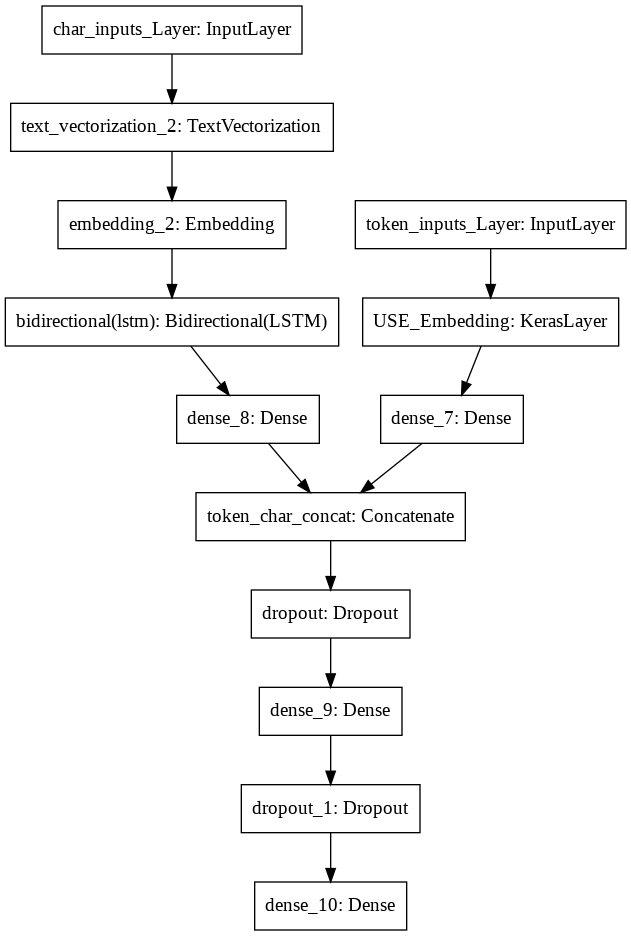

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes = True)

In [ ]:
# Creating tf.data datasets from both character and token datasets
train_char_tokens = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # Training character-token dataset
train_char_tokens_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # Training character-token labels
train_char_tokens_dt = tf.data.Dataset.zip((train_char_tokens, train_char_tokens_labels)) # Combining the character-token datasets
train_char_tokens_dt = train_char_tokens_dt.batch(32).prefetch(tf.data.AUTOTUNE) # Batching and autotuning the fetching process

In [ ]:
val_char_tokens = tf.data.Dataset.from_tensor_slices((validation_sentences, val_chars))
val_char_tokens_labels = tf.data.Dataset.from_tensor_slices(validation_labels_one_hot)
val_char_tokens_dt = tf.data.Dataset.zip((val_char_tokens, val_char_tokens_labels))
val_char_tokens_dt = val_char_tokens_dt.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_char_tokens = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_tokens_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_tokens_dt = tf.data.Dataset.zip((test_char_tokens, test_char_tokens_labels))
test_char_tokens_dt = test_char_tokens_dt.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Creating TensorBoard callback for model 4
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = '/content/TensorBoard/model_4_hybrid')

# Fitting the model
history_4 = model_4.fit(train_char_tokens_dt,
            epochs = 10,
            verbose = 1,
            callbacks = [early_stopper, tensorboard_cb],
            validation_data = val_char_tokens_dt)

Epoch 1/10
5627/5627 [==============================] - 304s 53ms/step - loss: 0.7440 - accuracy: 0.7167 - val_loss: 0.6178 - val_accuracy: 0.7639
Epoch 2/10
5627/5627 [==============================] - 293s 52ms/step - loss: 0.6597 - accuracy: 0.7522 - val_loss: 0.5857 - val_accuracy: 0.7756
Epoch 3/10
5627/5627 [==============================] - 291s 52ms/step - loss: 0.6333 - accuracy: 0.7626 - val_loss: 0.5706 - val_accuracy: 0.7836
Epoch 4/10
5627/5627 [==============================] - 293s 52ms/step - loss: 0.6158 - accuracy: 0.7685 - val_loss: 0.5611 - val_accuracy: 0.7866
Epoch 5/10
5627/5627 [==============================] - 292s 52ms/step - loss: 0.6037 - accuracy: 0.7737 - val_loss: 0.5566 - val_accuracy: 0.7896
Epoch 6/10
5627/5627 [==============================] - 294s 52ms/step - loss: 0.5921 - accuracy: 0.7781 - val_loss: 0.5458 - val_accuracy: 0.7939
Epoch 7/10
5627/5627 [==============================] - 295s 52ms/step - loss: 0.5903 - accuracy: 0.7798 - val_loss: 0

In [ ]:
model_4.evaluate(test_char_tokens_dt)

942/942 [==============================] - 21s 22ms/step - loss: 0.5558 - accuracy: 0.7913


[0.5558127760887146, 0.7913057804107666]

In [ ]:
# Model 4 metrics
model_4_probs = model_4.predict(test_char_tokens_dt)
model_4_preds = tf.argmax(model_4_probs, axis = 1)
model_4_results = model_evaluation(test_labels_int, model_4_preds)
model_4_results

{'Accuracy': 0.7913057906089265,
 'F1': 0.7866231301404458,
 'Precision': 0.7892478176274277,
 'Recall': 0.7913057906089265}

## Model 5: Tribrid with Tokens, Character and Positional Embeddings

In [ ]:
train_df.head()

,target,text,line number,total lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
# Finding the 98th percentile of line numbers
np.percentile(train_df['line number'], 98)

15.0

In [ ]:
# One-hot encoding the line number feature in each dataset
line_number_one_hot = tf.one_hot(train_df['line number'].to_numpy(),
                                 depth = np.percentile(train_df['line number'], 98))
total_lines_one_hot = tf.one_hot(train_df['total lines'].to_numpy(),
                                 depth = np.percentile(train_df['total lines'], 98))

In [ ]:
val_line_number_one_hot = tf.one_hot(validation_df['line number'].to_numpy(),
                                 depth = np.percentile(validation_df['line number'], 98))
val_total_lines_one_hot = tf.one_hot(validation_df['total lines'].to_numpy(),
                                 depth = np.percentile(validation_df['total lines'], 98))

In [ ]:
line_number_one_hot, total_lines_one_hot

(<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(180040, 20), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>)

In [ ]:
# Outlining the model

# Creating the token embeddings model
token_inputs = layers.Input(shape = [], dtype = tf.string, name = 'token_inputs')
token_embeddings = use_embedder(token_inputs) #Embedder for tokens
token_dense = layers.Dense(128, activation = 'relu')(token_embeddings)
token_model =  tf.keras.Model(inputs = token_inputs, outputs = token_dense,
                              name = 'token_model')

# Creating the character embeddings model
char_inputs = layers.Input(shape = (1, ), dtype = tf.string, name = 'char_inputs')
char_vectors = chars_tokenizer(char_inputs)
char_embeddings = chars_embedder(char_vectors) #Character-level embeddings
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs, outputs = char_bi_lstm,
                            name = 'char_model')

# Creating the positional embeddings model
line_number_inputs = layers.Input(shape = (15, ), dtype = tf.float32, name = 'line numbers')
line_number_dense = layers.Dense(64, activation = 'relu')(line_number_inputs)
line_number_model = tf.keras.Model(inputs = line_number_inputs,
                                   outputs = line_number_dense)

# Creating the total line input model
total_line_inputs = layers.Input(shape = (20, ), dtype = tf.float32)
total_line_dense = layers.Dense(64, activation = 'relu')(total_line_inputs)
total_line_model = tf.keras.Model(inputs = total_line_inputs,
                                  outputs = total_line_dense)

# Creating the hybrid token-character model
token_char_hybrid = layers.Concatenate()([token_model.output,
                                        char_model.output])
hybrid_dense = layers.Dense(128, activation = 'relu')(token_char_hybrid)
dropout_1 = layers.Dropout(rate = 0.5)(hybrid_dense)

# Concatenating the outputs into the final tribrid token-char-position model
token_char_pos_tribrid = layers.Concatenate()([line_number_model.output,
                                             total_line_model.output,
                                             dropout_1])

# Final dense layer
final_outputs = layers.Dense(5, activation = 'softmax')(token_char_pos_tribrid)

In [ ]:
# Creating the model
model_5 = tf.keras.Model(inputs = [token_model.input,
                                   char_model.input,
                                   line_number_model.input,
                                   total_line_model.input],
                         outputs = final_outputs)
model_5.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
text_vectorization_2 (TextVecto (None, 579)          0           char_inputs[0][0]                
__________________________________________________________________________________________________
USE_Embedding (KerasLayer)      (None, 512)          256797824   token_inputs[0][0]               
___________________________________________________________________________________________

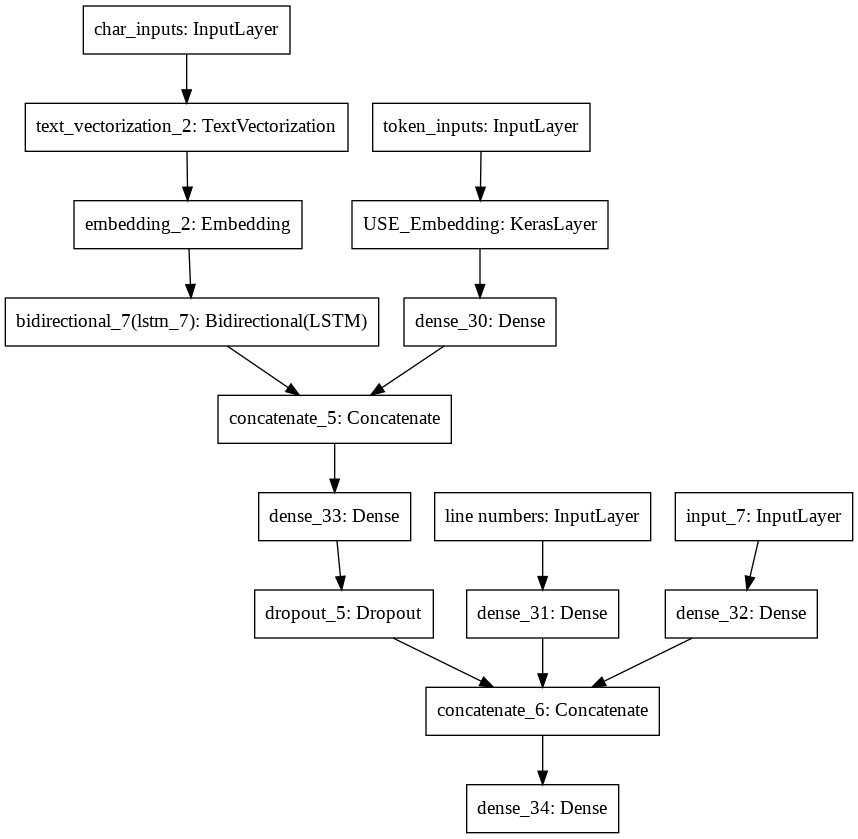

In [ ]:
plot_model(model_5)

In [ ]:
# Compiling the model
model_5.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
                metrics = ['accuracy'])

In [ ]:
# Creating the tf.data datasets for the model and batching and prefetching them
train_tok_char_pos_features = tf.data.Dataset.from_tensor_slices((train_sentences,
                                                                  train_chars,
                                                                  line_number_one_hot,
                                                                  total_lines_one_hot))
train_labels_dataset = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_features_dataset = tf.data.Dataset.zip((train_tok_char_pos_features, train_labels_dataset))
train_features_dataset = train_features_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_tok_char_pos_features = tf.data.Dataset.from_tensor_slices((validation_sentences,
                                                                  val_chars,
                                                                  val_line_number_one_hot,
                                                                  val_total_lines_one_hot))
val_labels_dataset = tf.data.Dataset.from_tensor_slices(validation_labels_one_hot)
val_features_dataset = tf.data.Dataset.zip((val_tok_char_pos_features, val_labels_dataset))
val_features_dataset = val_features_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_features_dataset, val_features_dataset

(<PrefetchDataset shapes: (((None,), (None,), (None, 15), (None, 20)), (None, 5)), types: ((tf.string, tf.string, tf.float32, tf.float32), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,), (None, 15), (None, 20)), (None, 5)), types: ((tf.string, tf.string, tf.float32, tf.float32), tf.float64)>)

In [ ]:
# Creating the TensorBoard callback for model 5
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = '/content/TensorBoard/model_5_tribrid')

# Fitting the model
history_5 = model_5.fit(train_features_dataset,
                        epochs = 5,
                        callbacks = [early_stopper, tensorboard_cb],
                        verbose = 1,
                        validation_data = val_features_dataset)

Epoch 1/5
5627/5627 [==============================] - 307s 53ms/step - loss: 0.9531 - accuracy: 0.8258 - val_loss: 0.9081 - val_accuracy: 0.8498
Epoch 2/5
5627/5627 [==============================] - 299s 53ms/step - loss: 0.9116 - accuracy: 0.8546 - val_loss: 0.8969 - val_accuracy: 0.8565
Epoch 3/5
5627/5627 [==============================] - 298s 53ms/step - loss: 0.8990 - accuracy: 0.8632 - val_loss: 0.8950 - val_accuracy: 0.8571
Epoch 4/5
5627/5627 [==============================] - 297s 53ms/step - loss: 0.8905 - accuracy: 0.8698 - val_loss: 0.8929 - val_accuracy: 0.8587
Epoch 5/5
5627/5627 [==============================] - 295s 52ms/step - loss: 0.8833 - accuracy: 0.8752 - val_loss: 0.8909 - val_accuracy: 0.8593


In [ ]:
# Model 5 metrics
model_5_probs = model_5.predict(val_features_dataset)
model_5_preds = tf.argmax(model_5_probs, axis = 1)
model_5_results = model_evaluation(validation_labels_int, model_5_preds)
model_5_results

{'Accuracy': 0.8593274195683834,
 'F1': 0.8566299984620642,
 'Precision': 0.8609710572660495,
 'Recall': 0.8593274195683834}

In [ ]:
# Uploading the results to TensorBoard
!tensorboard dev upload --logdir '/content/TensorBoard' \
  --name 'PubMed 20K RCT Models' \
  --one_shot

2021-05-31 05:55:17.556619: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/TensorBoard

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%